In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os; os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
import tensorflow as tf
import numpy as np
import cv2
import numpy as np
from pathlib import Path
from PIL import Image
from glob import glob
from utils import *
import matplotlib.pyplot as plt
from skimage import io

from datasets import load_dataset

2024-06-25 16:20:20.557414: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-25 16:20:22.418397: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
def sample_metric(img1, img2):
    return rmse(img1, img2)

## Cargar TID13

Esto lleva un ratito :D

In [5]:
TID13 = load_dataset("jorgvt/TID2013", num_proc = 8)

In [6]:
next(iter(TID13["train"]))

AttributeError: module 'PIL.Image' has no attribute 'ExifTags'

## Transformacionea afines a imágenes

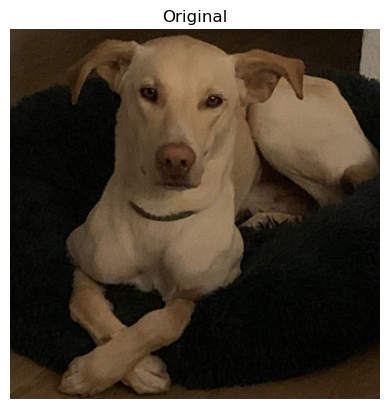

In [7]:
baldur = io.imread("Baldur.jpeg")
baldur = baldur/255.

plt.imshow(baldur)
plt.title("Original")
plt.axis("off")
plt.show()

### Mosaico

2024-06-25 16:21:03.594217: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-06-25 16:21:03.594273: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: mlui01.ific.uv.es
2024-06-25 16:21:03.594286: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: mlui01.ific.uv.es
2024-06-25 16:21:03.594460: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 545.23.6
2024-06-25 16:21:03.594514: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 545.23.6
2024-06-25 16:21:03.594527: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 545.23.6


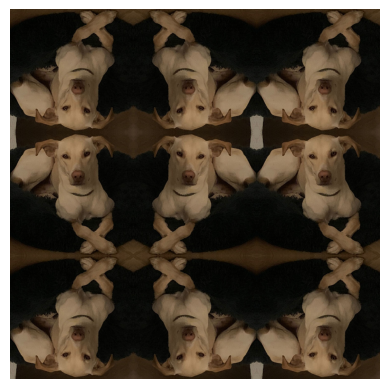

In [8]:
baldur_mosaico = crear_mosaico(baldur[None,:,:,:])[0]
plt.imshow(baldur_mosaico)
plt.axis("off")
plt.show()

### Traslacion

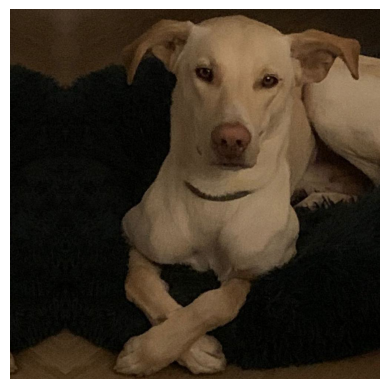

In [17]:
baldur_tras = trasladar2(baldur_mosaico[None,:,:,:],(1000,1000),0,-150)[0]
plt.imshow(baldur_tras)
plt.axis("off")
plt.show()

### Rotacion

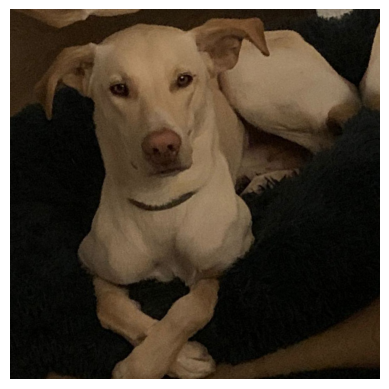

In [18]:
baldur_rot = rotar2(baldur_mosaico,(1000,1000),15)
plt.imshow(baldur_rot)
plt.axis("off")
plt.show()

### Escala

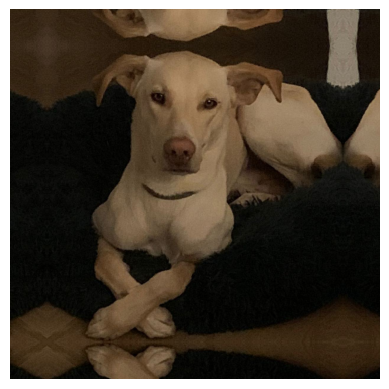

In [19]:
baldur_esc = escalar_mosaico(baldur[None,:,:,:], escala = 0.8, size = (1000,1000))[0]
baldur_esc.shape
plt.imshow(baldur_esc)
plt.axis("off")
plt.show()

#### Todas juntas

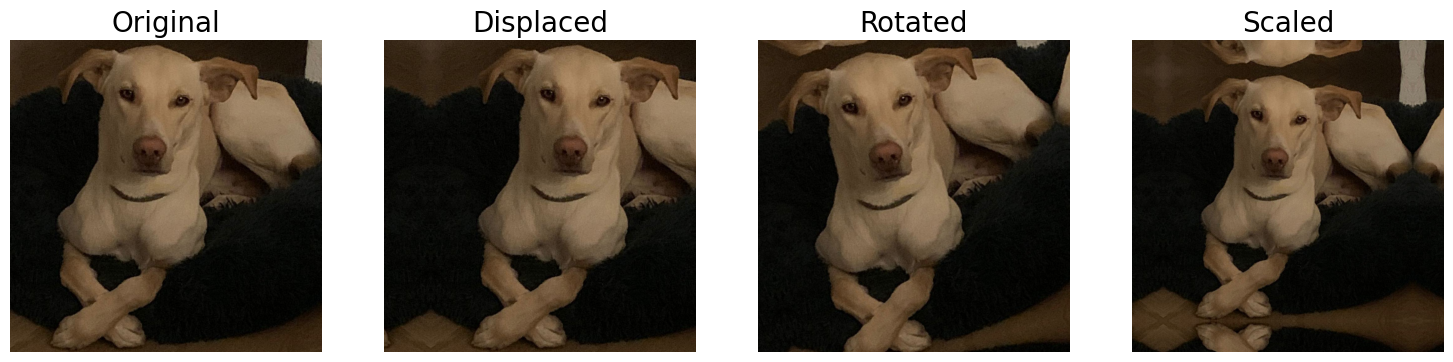

In [20]:
font = 20

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
f.set_size_inches(18.5, 10.5)
ax1.set_title("Original",
          fontsize = font)
ax1.imshow(baldur, cmap = "gray")
ax2.set_title("Displaced",
          fontsize = font)
ax2.imshow(baldur_tras, cmap = "gray")
ax3.set_title("Rotated",
          fontsize = font)
ax3.imshow(baldur_rot, cmap = "gray")
ax4.set_title("Scaled",
          fontsize = font)
ax4.imshow(baldur_esc, cmap = "gray")

ax1.axis("off")
ax2.axis("off")
ax3.axis("off")
ax4.axis("off")

plt.show()

### Pasar por tu métrica las parejas de imágenes original-distorsionada 

In [ ]:
# #LECTURA DE LAS IMÁGENES ROTADAS

folder_dir = './Rotaciones'
paths = list()
Xtrain = list()

# iterate over files in
# that directory
images = Path(folder_dir).glob("*.png")
for image in images:
    paths.append(image)

for path in paths:
    image = Image.open(path)
    data = np.asarray(image)
    Xtrain.append(data)

Xtrain = np.array(Xtrain)
Xtrain = Xtrain.astype(np.float32)/255.
rotaciones = Xtrain

print("Rotaciones:", rotaciones.shape)

imgs = []
rotacs = []

for path in paths:    
    img, rot, dec= re.findall("\d+",str(path))
    img = int(img)
    rot = str(rot + "." + dec)
    imgs.append(img)
    rotacs.append(rot)

rotaciones = pd.DataFrame()
rotaciones["Paths"] = paths
rotaciones["Imagenes"] = imgs
rotaciones["Rotaciones"] = rotacs

rotaciones = rotaciones.sort_values("Rotaciones", ascending=False).reset_index()

b = np.repeat(range(1,len(rotaciones.Rotaciones.unique())+1),30)[::-1]
rotaciones["Intensidad"] = b